# Use the trapezoidal extraction to perform a box-like extraction
- Can be used for decontaminated orders
- Accounts implicitely for the tilt in the wavelength solution (unlike a simple box extraction)

## Imports

In [1]:
# Imports for plots
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm #for better display of FITS images

# Imports from standard packages
from astropy.io import fits
import numpy as np

# Imports for extraction
from extract.overlap import TrpzOverlap, TrpzBox

### Matplotlib defaults

In [2]:
%matplotlib inline

In [3]:
plt.rc('figure', figsize=(9,3))
plt.rcParams["image.cmap"] = "inferno"

## Read some ref files

In [4]:
# Read relevant files
wv_1 = fits.open("extract/Ref_files/wavelengths_m1.fits")[0].data
wv_2 = fits.open("extract/Ref_files/wavelengths_m2.fits")[0].data
P1 = fits.open("extract/Ref_files/spat_profile_m1.fits")[0].data.squeeze()
P2 = fits.open("extract/Ref_files/spat_profile_m2.fits")[0].data.squeeze()

# Convert to float (fits precision is 1e-8)
wv_1 = wv_1.astype(float)
wv_2 = wv_2.astype(float)
P1 = P1.astype(float)
P2 = P2.astype(float)

## Load simulation

In [5]:
# Import custom function to read toy simulation
from sys import path
path.append("Fake_data")
from simu_utils import load_simu
# Load a simulation (only order 1)
simu = load_simu("Fake_data/phoenix_teff_02300_scale_1.0e+02.fits", order=1)
data = simu["data"]

## Extraction

In [6]:
# Use a single row for final wavelength bin
grid_box = wv_1[50,:]

In [7]:
# Define extraction object
extra = TrpzBox(P1, wv_1, box_width=40)

# Extract the flux
f_k = extra.extract(data=data)

# Bin to pixels
_, f_bin = extra.bin_to_pixel(grid_pix=grid_box, f_k=f_k)

`f_bin` is equivalent to the output of a box extraction (same units)

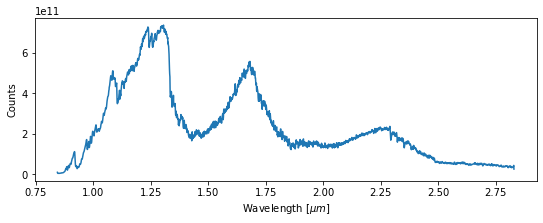

In [8]:
plt.plot(grid_box, f_bin)
plt.xlabel("Wavelength [$\mu m$]")
plt.ylabel("Counts")
plt.show()